In [2]:
# Basic Concepts in Time Series

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

##### In this first part we will creat mock data, then later we will import some financial data. 

In [3]:
# Generate example time series data
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
n = len(date_rng)

### Creating Mock Time Series Data

##### We are creating trend, seasonality and noise then combining them togther to create a mock time series data. 

In [4]:
# Trend
trend = np.linspace(0, 20, n)

# Seasonality
seasonality = 5 * np.sin(2 * np.pi * np.arange(n) / 365.25)

# Cycle
cycle = 3 * np.sin(2 * np.pi * np.arange(n) / (365.25 * 2))

# Noise
noise = np.random.normal(0, 1, n)

# Combine components
ts = trend + seasonality + cycle + noise

# Create DataFrame
df = pd.DataFrame(data={'date': date_rng, 'value': ts})
df.set_index('date', inplace=True)

In [5]:
df

,value
date,
2020-01-01,0.496714
2020-01-02,-0.012754
2020-01-03,0.898681
2020-01-04,1.899450
2020-01-05,0.267612
...,...
2023-12-27,20.140038
2023-12-28,19.893091
2023-12-29,20.927031


##### Lets plot the time series data

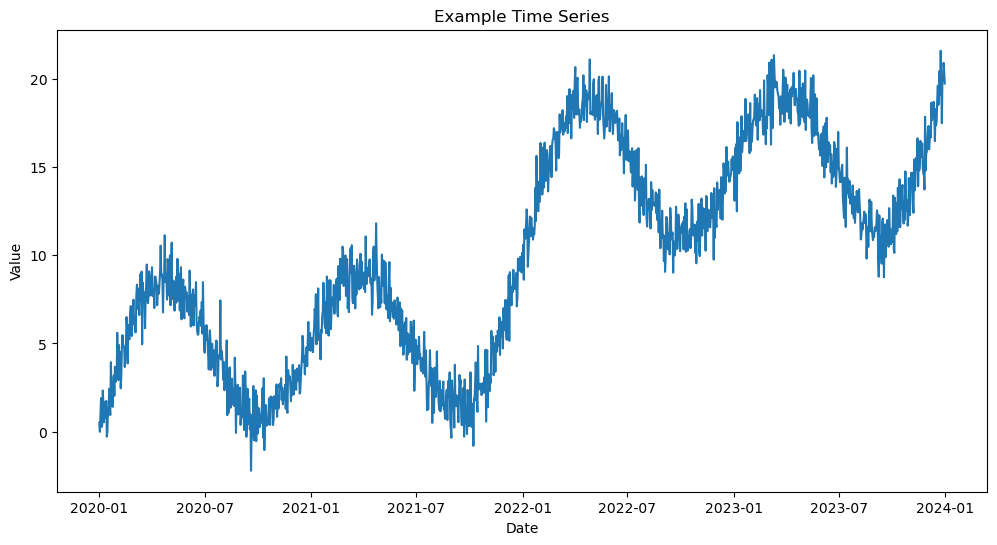

In [6]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'])
plt.title('Example Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

##### Next we will decompose the time series data using from statsmodels.tsa.seasonal import seasonal_decompose, model='additive' and period=365. 

- The seasonal_decompose function will decompose the time series data into trend, seasonality and noise.
- The model='additive' is used when the magnitude of the seasonal variation does not change with the level of the time series data.
- The period=365 is used to specify the number of periods in a year.

In [7]:
# Decompose the time series
result = seasonal_decompose(df['value'], model='additive', period=365)

##### Then we plot the decomposed time series data.

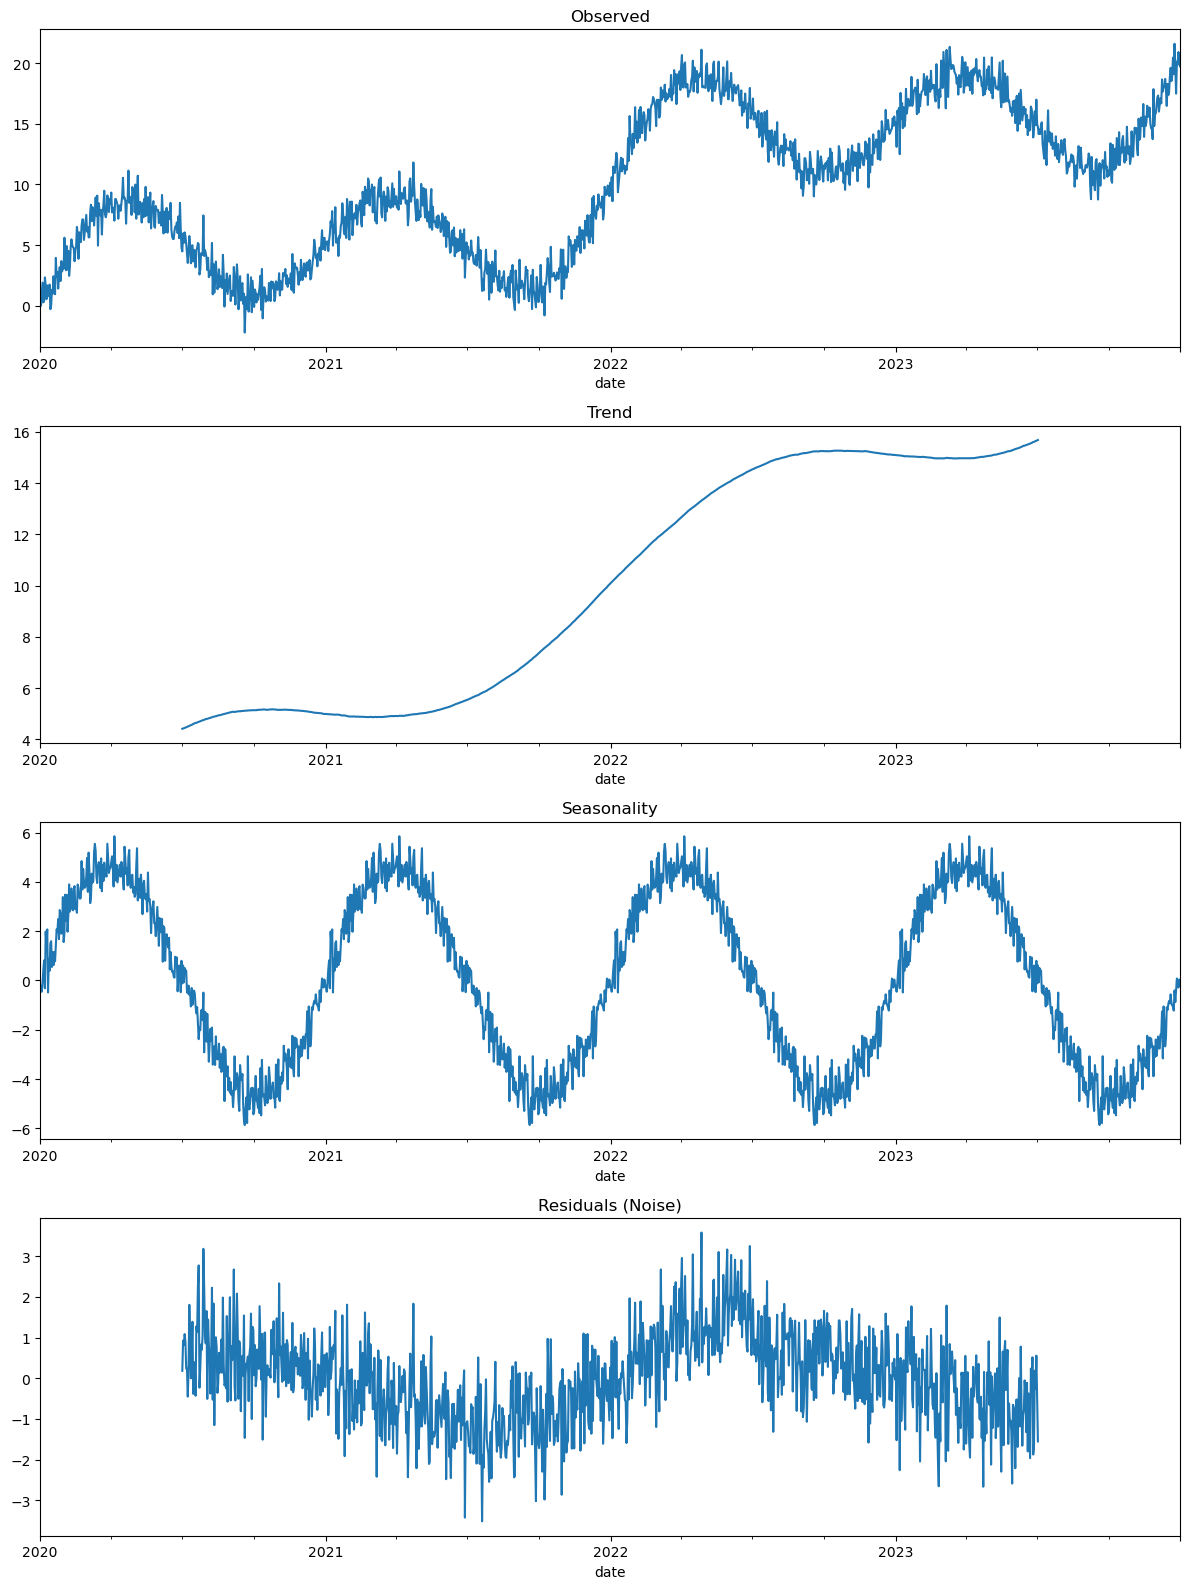

In [8]:
# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonality')
result.resid.plot(ax=ax4)
ax4.set_title('Residuals (Noise)')
plt.tight_layout()
plt.show()

# **Explanation of components**

#####  **Components of Time Series:** 
##### **Trend:** 
**Business Importance:** Trends show the long-term direction of your business or product performance. They help decision makers understand:

- Overall growth or decline
- Long-term market positioning
- Effectiveness of strategic decisions

**Example:** If sales are trending upward over years, it might indicate successful market penetration or product improvement. A downward trend could signal market saturation or increasing competition.

##### **Seasonality:** 
**Business Importance:** Seasonality reveals predictable patterns tied to specific time periods. Understanding seasonality helps in:

- Resource allocation
- Inventory management
- Marketing campaign timing
- Cash flow management

**Example:** A retail business might see sales peaks during holidays. Recognizing this allows for better inventory stocking, staffing decisions, and targeted marketing efforts.

##### **Cycles:** 
**Business Importance:** Cycles are longer-term patterns not tied to calendar seasons. They're crucial for:

- Long-term strategic planning
- Understanding broader market dynamics
- Anticipating industry-wide changes

**Example:** In the tech industry, product cycles might align with major technology advancements. Understanding these cycles can inform R&D investments and product launch timings.

##### **Noise:** 
**Business Importance:** Noise represents random fluctuations. Understanding noise is key for:

- Distinguishing between significant changes and random variations
- Setting realistic expectations and goals
- Avoiding overreaction to short-term fluctuations

**Example:** Daily sales figures might fluctuate randomly. Recognizing this as noise prevents unnecessary panic over short-term dips or unwarranted excitement over short-term spikes.

**The decomposition plot shows how these components combine to form the observed time series.** 
**Understanding these components is crucial for effective time series analysis and forecasting.** 